/tmp/ipykernel_61218/3814392423.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


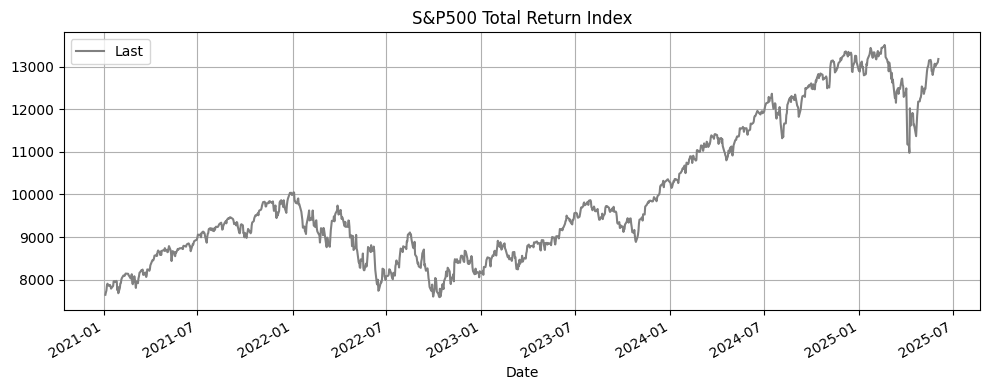

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
sp500 = pd.read_csv('Data/sp500_tr.csv', parse_dates=True, index_col='Date', decimal='.', date_format='%d-%m-%Y')

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sp500.plot(color='gray', ax=ax)
ax.grid()
ax.set_title('S&P500 Total Return Index')
fig.tight_layout()
fig.show()

In [21]:
import numfolio as nf

returns = sp500.Last.diff().dropna().values
metrics = ['sortino_ratio', 'cvar', 'max_drawdown']

samples = dict()
historical = dict()

for m in metrics:
    samples[m] = nf.bootstrap_metric(returns, metric=m, n_jobs=8, n_bootstraps=2000, rng=1234, min_length=20)
    f = getattr(nf, f'compute_{m}')
    historical[m] = f(returns)
    
samples = pd.DataFrame(samples)


/tmp/ipykernel_61218/4237365893.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


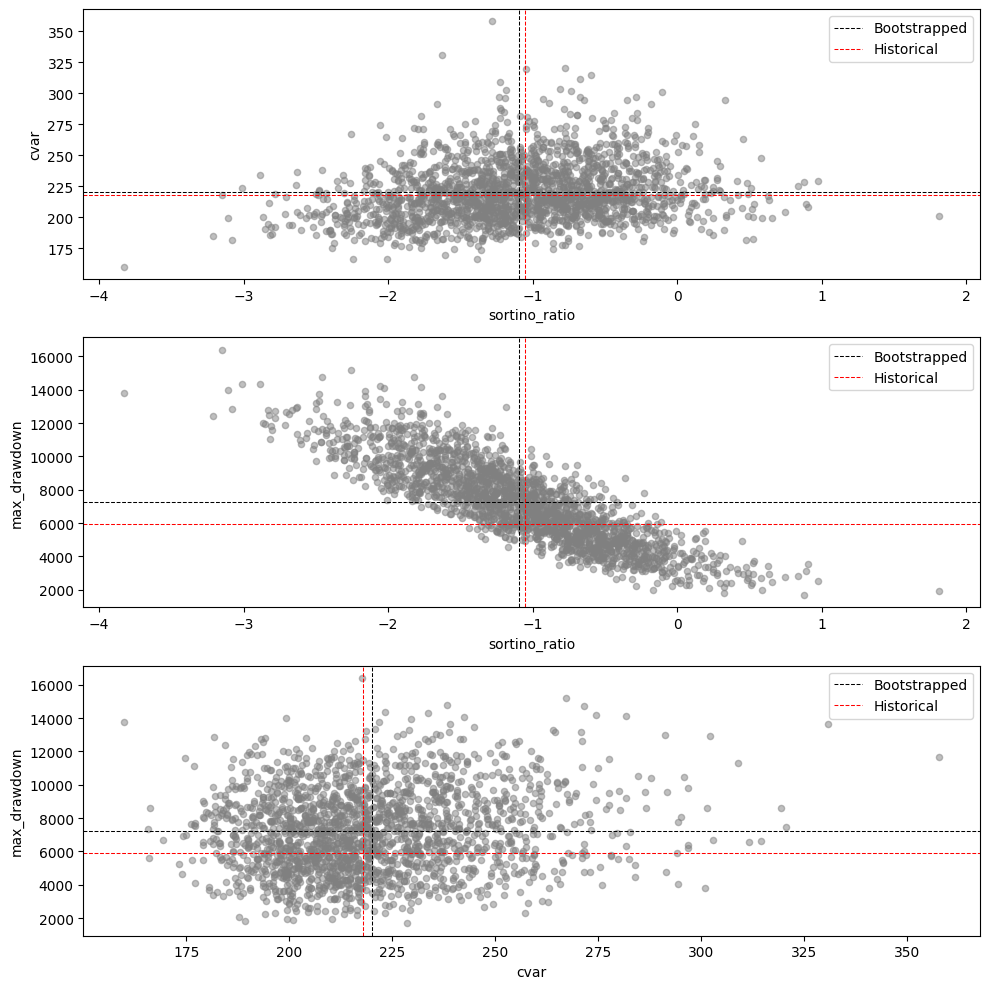

In [24]:
from itertools import combinations

pairs = list(combinations(metrics, 2))
fig, axes = plt.subplots(len(pairs), 1, figsize=(10, 10))

for (x, y), ax in zip(pairs, axes):

    
    x_mean = samples[x].mean()
    y_mean = samples[y].mean()

    x_h = historical[x]
    y_h = historical[y]
    
    samples.plot(kind='scatter', x=x, y=y, ax=ax, alpha=0.5, color='gray')
    
    ax.axvline(x_mean, color='black', linestyle='dashed', linewidth=0.75, label='Bootstrapped')
    ax.axhline(y_mean, color='black', linestyle='dashed', linewidth=0.75)
    ax.axvline(x_h, color='red', linestyle='dashed', linewidth=0.75, label='Historical')
    ax.axhline(y_h, color='red', linestyle='dashed', linewidth=0.75)

    ax.legend(loc='best')

fig.tight_layout()
fig.show()